In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

In [2]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [2]:
Entropia = []
for n in range(0,1021):
    W = np.log(math.factorial(1020)/(math.factorial(n)*math.factorial(1020-n)))
    S = 1.38*10**(-23)*W
    Entropia.append(S)
print(Entropia)
       

[0.0, 9.560029910664076e-23, 1.8162163107338711e-22, 2.6203399520989163e-22, 3.3846278409190724e-22, 4.1179861596862695e-22, 4.82604820995647e-22, 5.512701438799693e-22, 6.180791173634194e-22, 6.832490553240737e-22, 7.469513750632384e-22, 8.0932475771434815e-22, 8.704837132281535e-22, 9.305243956862964e-22, 9.895286908571219e-22, 1.047567173521015e-21, 1.104701300076912e-21, 1.1609850686724095e-21, 1.216466299287317e-21, 1.2711876366615184e-21, 1.3251873472410235e-21, 1.3784999604503938e-21, 1.431156790539399e-21, 1.483186365572675e-21, 1.5346147833393465e-21, 1.5854660091108328e-21, 1.635762126658925e-21, 1.6855235513599259e-21, 1.7347692122833315e-21, 1.7835167087100493e-21, 1.8317824454168654e-21, 1.8795817502101454e-21, 1.926928976527903e-21, 1.9738375934085857e-21, 2.020320264713065e-21, 2.066388919158027e-21, 2.112054812455508e-21, 2.1573285826403386e-21, 2.2022202994941453e-21, 2.2467395088328477e-21, 2.290895272308078e-21, 2.33469620327653e-21, 2.3781504992111405e-21, 2.4212659

El número máximo de microestados $\Omega$ que puede calcular python es, aproximadamente, 1020.

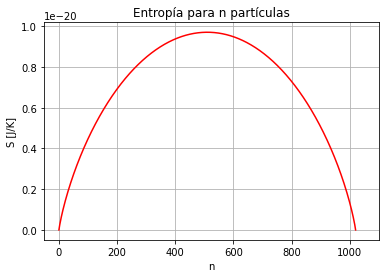

In [3]:
fig=plt.figure()
x = np.arange(0,1021 )
plt.plot(x, [Entropia[i] for i in x], color= 'r')
plt.title('Entropía para n partículas')
plt.xlabel('n')
plt.xlim(right=1100)
#enteros en x
plt.ylabel('S [J/K]')
plt.grid()
plt.show()

### Datos de Google Sheets: ###

In [4]:
Entropia_Sheets = pd.read_csv('extra1.csv')
Entropia_Sheets

,n (número de partículas ),entropía
0,0,0.000000e+00
1,1,7.090000e-23
2,2,1.320000e-22
3,3,1.880000e-22
4,4,2.390000e-22
...,...,...
166,166,2.390000e-22
167,167,1.880000e-22
168,168,1.320000e-22
169,169,7.090000e-23


En Google Sheets, se permitió un número $n$ de 170 partículas (la función factorial permitía un valor máximo de 170). Se obtuvo la siguiente gráfica correspondiente a la entropía:

<img src = 'Entropía (2).png'>

## Animación para 9 partículas en una caja: ##

En esta pequeña simulación, emplearemos dos matrices para ilustrar el movimiento de una partícula de un lado de la caja al otro y el cambio en la entropía del sistema.

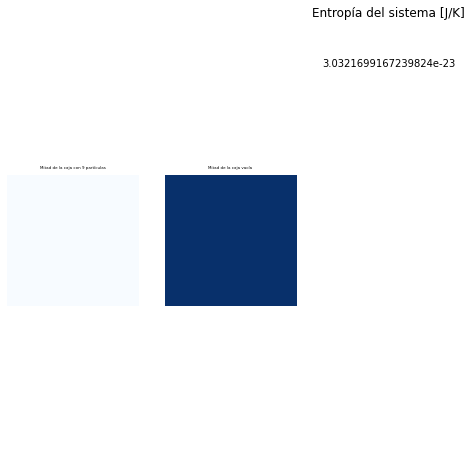

In [228]:
Entropia_9 = [] #Para un sistema de 9 partículas, conseguir los valores de entropía del sistema
for n in range(0,9):
    W = np.log(math.factorial(9)/(math.factorial(n)*math.factorial(9-n)))
    S = 1.38*10**(-23)*W
    Entropia_9.append(S)
matrices = np.array([[0.0,1.0,1.0],[1.0,1.0,1.0],[1.0, 1.0, 1.0]]) #Elaborar dos matrices que simulan las cajas
matrices2 = np.array([[1.0,0.0,0.0],[0.0,0.0,0.0],[0.0, 0.0, 0.0]])
fig, ax = plt.subplots(1,3,figsize=(8,8)) #crear figuras y ejes
im = ax[0].imshow(matrices,cmap=plt.cm.Blues) #función cmap para asignar color a los valores de las matrices (azul=partícula, blanco= espacio libre)
im2 = ax[1].imshow(matrices2,cmap=plt.cm.Blues)
ax[0].set_title("Mitad de la caja con 9 partículas",fontsize=4) #títulos y detalles de los ejes en los gráficos
ax[1].set_title("Mitad de la caja vacía",fontsize=4)
ax[2].set_title("Entropía del sistema [J/K]")
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[2].set(xlim=(0,10),ylim=(0,10))
label = ax[2].text(0,9,Entropia_9[0]) #Imprimir la entropía inicial
def update(i): #actualizamos ambas mitades de la caja con los cuadros de la animación (i=10)
    if i<3:
        matrices[0,i] = 0.0 #actualizamos el valor de las matrices
        matrices2[0,i] = 1.0
        im.set_array(matrices)
        im2.set_array(matrices2)
        label.set_text(Entropia_9[i+1]) #actualizamos el valor de la entropía
    elif 3<i<7:
        matrices[1,i-4] = 0.0 
        matrices2[1,i-4] = 1.0
        im.set_array(matrices)
        im2.set_array(matrices2)
        label.set_text(Entropia_9[i-1])
    elif i>=7:
        matrices[2,i-7] = 0.0
        matrices2[2,i-7] = 1.0
        im.set_array(matrices)
        im2.set_array(matrices2)
        label.set_text(Entropia_9[i-1])
        
anima= animation.FuncAnimation(fig, update, frames=10, interval=100) #Elaboramos la animación
anima